# A Credit Card Dataset for Machine Learning!

## Importando librerías

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,8
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# Análisis y limpieza de los datasets

## Análisis de los datasets

### Análisis del primer dataset 

In [63]:
application_record = pd.read_csv("application_record.csv")
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [64]:
#Cada ID corresponde a un cliente. Veamos cuantos valores tenemos.
len(application_record["ID"].unique())

438510

In [65]:
#Eliminamos las IDs duplicadas.
application_record.drop_duplicates(subset='ID',keep='first', inplace=True)

In [66]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [67]:
#Explorando los valores nulos. OCCUPATION TYPE tiene muchos missing values (más de un cuarto).
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [68]:
#Como podemos observar, la columna contiene valores categóricos difícilmente agrupables.
application_record["OCCUPATION_TYPE"].value_counts()

Laborers                 78231
Core staff               43000
Sales staff              41094
Managers                 35481
Drivers                  26090
High skill tech staff    17285
Accountants              15983
Medicine staff           13518
Cooking staff             8076
Security staff            7993
Cleaning staff            5843
Private service staff     3455
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [69]:
#Vemos que los valores nulos lo son porque no se sabe el OCCUPATION_TYPE, no porque no tengan trabajo/ingresos.
application_record[application_record["OCCUPATION_TYPE"].isnull()]["NAME_INCOME_TYPE"].value_counts() 

Pensioner               75352
Working                 35884
Commercial associate    16742
State servant            6210
Student                     5
Name: NAME_INCOME_TYPE, dtype: int64

In [70]:
application_record[application_record["OCCUPATION_TYPE"].isnull()]["AMT_INCOME_TOTAL"].value_counts().sort_index() 
#confirmado todos trabajan o cobran una pensión

26100.0       2
27000.0      16
27900.0       1
28350.0       2
28800.0       3
             ..
945000.0      6
990000.0      4
1125000.0     1
1260000.0     1
1575000.0     4
Name: AMT_INCOME_TOTAL, Length: 498, dtype: int64

In [71]:
#Value_Counts de todas las categorías
columns = application_record.columns.to_list()
for column in columns: 
    print(application_record[column].value_counts())

6293503    1
5174645    1
5150073    1
5145979    1
6204798    1
          ..
5677443    1
6723972    1
5671302    1
5699976    1
6291456    1
Name: ID, Length: 438510, dtype: int64
F    294406
M    144104
Name: CODE_GENDER, dtype: int64
N    275427
Y    163083
Name: FLAG_OWN_CAR, dtype: int64
Y    304040
N    134470
Name: FLAG_OWN_REALTY, dtype: int64
0     304040
1      88518
2      39878
3       5429
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64
135000.0    46875
157500.0    39762
180000.0    37909
112500.0    36974
225000.0    34127
            ...  
300600.0        1
621000.0        1
109899.0        1
283185.0        1
83304.0         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64
Working                 226076
Commercial associate    100744
Pensioner                75488
State servant            36185
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / seco

<AxesSubplot:>

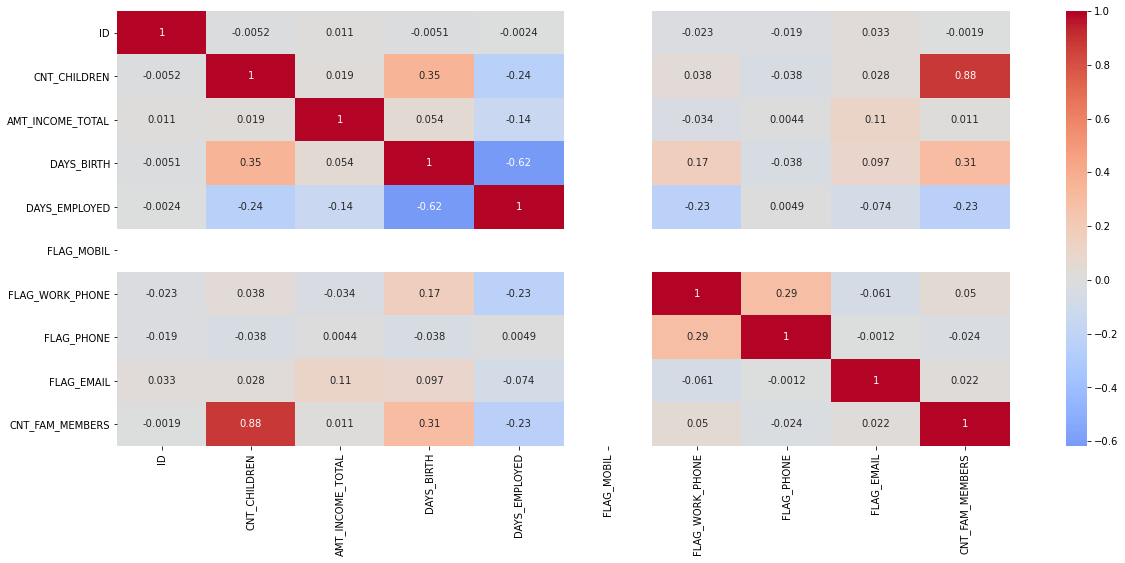

In [72]:
#Llegados a este punto usaremos Seaborn para visualizar las correlaciones entre variables.
#Parece que la cantidad de hijos y la cantidad de miembros de la familia está muy correlacionados
#También lo están, pero a la inversa, el número de dias employed con la edad.

sns.heatmap(application_record.select_dtypes(include=np.number).corr(), center=0, cmap = "coolwarm", annot = True) 

#### Conclusiones

Dos columnas (CNT_CHILDREN y CNT_FAM_MEMBERS) presentan una alta colinearidad, por lo que sería preferible prescindir de una de ellas.

Las columnas DAYS_BIRTH y DAYS_EMPLOYED necesitan cambiar de formato para ser útiles. 

Las columnas con flags binarios (CODE_GENDER, FLAG_OWN_CAR y FLAG_OWN_REALTY) deben ser codificadas en 0 y 1.

Las columnas categóricas (NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS y NAME_HOUSING_TYPE) tendrán que agrupar sus valores en la medida de lo posible. Si no aportan información relevante sería conveniente prescindir de ellas.

Podemos borrar OCCUPATION_TYPE ya que tiene demasiados missing values y nos aporta menos valor que NAME_INCOME_TYPE.

### Análisis del segundo dataset

In [73]:
credit_record = pd.read_csv("credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [74]:
#Creamos una lista de los Id de los clientes que son clientes actualmente.
id_info_actual = credit_record[credit_record["MONTHS_BALANCE"] == 0].reset_index(drop=True)["ID"].to_list()

In [75]:
#Filtramos el dataset y sólo seleccionamos estos clientes.
credit_record = credit_record[credit_record["ID"].isin(id_info_actual)] 

In [76]:
#Contamos el número de meses que han tenido cada status.
credit_record_new = pd.DataFrame(credit_record.groupby(['ID','STATUS'])["MONTHS_BALANCE"].count()).reset_index() 

In [77]:
credit_record_new

,ID,STATUS,MONTHS_BALANCE
0,5001711,0,3
1,5001711,X,1
2,5001712,0,10
3,5001712,C,9
4,5001713,X,22
...,...,...,...
69151,5150483,X,18
69152,5150484,0,12
69153,5150484,C,1
69154,5150485,0,2


Realizar este primer filtrado es sumamente importante, ya que el status nos informa del retraso con el que cada cliente paga (o no) sus créditos. Tener un status 5 significaría ser un moroso.

In [78]:
#Estos son los IDs de los clientes que en algún momento han tenido un 5.
Status_5 = list(credit_record_new[credit_record_new["STATUS"] == "5"]["ID"].unique()) 

In [79]:
#Cogemos la moda del status.
credit_record_new.drop_duplicates(subset="ID", keep="first", inplace=True) 

In [80]:
credit_record_new

,ID,STATUS,MONTHS_BALANCE
0,5001711,0,3
2,5001712,0,10
4,5001713,X,22
5,5001714,X,15
6,5001715,X,60
...,...,...,...
69150,5150481,X,43
69151,5150483,X,18
69152,5150484,0,12
69154,5150485,0,2


In [81]:
#Asignamos un 5 cuando el ID se encuentra en el listado Status_5, de lo contrario dejamos su status original.
credit_record_new["New_STATUS"] = np.where(credit_record_new["ID"].isin(Status_5),"5",credit_record_new["STATUS"]) 

In [82]:
#Eliminamos la columna status.
credit_record_new.drop("STATUS", axis = 1, inplace = True) 

In [83]:
credit_record_new

,ID,MONTHS_BALANCE,New_STATUS
0,5001711,3,0
2,5001712,10,0
4,5001713,22,X
5,5001714,15,X
6,5001715,60,X
...,...,...,...
69150,5150481,43,X
69151,5150483,18,X
69152,5150484,12,0
69154,5150485,2,0


#### Conclusiones

Ya que para nuestro análisis la variable target será el status de un cliente nos hemos centrado en asignar su valor a cada ID de cliente de manera fidedigna. Más adelante gestionaremos las múltiples categorías de status, ya que aún y estar representados mayormente por valores numéricos se trata de una variable categórica, lo cual puede llevar a errores.

## Data wrangling/cleaning

Ahora que conocemos el contenido y estructura de ambos dataframes procederemos a la limpieza de sus variables para su posterior uso.

### Realizando el merge de los dataframes

In [84]:
#Gracias a la variable ID presente en ambos datasets podemos realizar un rápido merge.
final_df = pd.merge(application_record, credit_record_new, on ='ID', how ='inner')

### Limpiando las variables

#### AGE

In [85]:
#Calculamos la edad (probablemente no sea 100% accurate, porque no todos los años tienen 365 días, pero nos da una edad aprox.).

final_df["AGE"] = final_df["DAYS_BIRTH"].apply(lambda x: int(-1*(x/365)))

#### Years_Employed

In [86]:
#Calculamos los años employed, los que tienen un valor 365243 son los que no están trabajando actualmente, sustituyo el valor por -1 

final_df["Years_Employed"] = final_df["DAYS_EMPLOYED"].apply(lambda x: int(-1*(x/365)) if x != 365243 else -1 )

In [87]:
def orderyears(year):
    if year >= 0 and year <= 2:
        return 1
    if year > 2 and year <= 5:
        return 2
    if year > 5 and year <= 10:
        return 3
    elif year > 10:
        return 4
    elif year == -1:
        return 0

final_df['Years_Employed'] = final_df['Years_Employed'].apply(orderyears)

#Se dividen los años trabajados en grupos 5
# 0 es que no estan trabajando (Todos son pensionistas)
# 1 es que llevan trabajando en la misma empresa de 0 a 2 años
# 2 es que llevan trabajando en la misma empresa de 2 a 5 años
# 3 es que llevan trabajando en la misma empresa de 5 a 10 años
# 4 es que llevan trabajando en la misma empresa mas de 10 años

In [88]:
final_df['Years_Employed'].apply(orderyears)

0        2
1        2
2        1
3        2
4        2
        ..
24667    2
24668    1
24669    1
24670    1
24671    1
Name: Years_Employed, Length: 24672, dtype: int64

#### FLAG_OWN_CAR, FLAG_OWN_REALTY, CODE_GENDER

In [89]:
#Sustituimos Y por 1 y N por 0 en los flags.

final_df["FLAG_OWN_CAR"] = final_df["FLAG_OWN_CAR"].apply(lambda x:1 if x == "Y" else 0)
final_df["FLAG_OWN_REALTY"] = final_df["FLAG_OWN_REALTY"].apply(lambda x:1 if x == "Y" else 0)
final_df["CODE_GENDER"] = final_df["CODE_GENDER"].apply(lambda x:1 if x == "M" else 0)

#### FLAG_MOBIL, MONTHS_BALANCE

Eliminamos la columna de mobil, ya que no no nos daba info y también la de days_birth y days_employed 
(ya que ya hemos calculado la nueva columna) y months_balance, ya que ya no la necesitamos.

In [90]:

final_df.drop(["FLAG_MOBIL", 'DAYS_BIRTH','DAYS_EMPLOYED',"MONTHS_BALANCE"], axis = 1, inplace = True)

#### Renombramos columnas y visualizamos correlaciones


In [91]:
final_df.rename(columns = {"CODE_GENDER": "GENDER","FLAG_OWN_CAR": "CAR", "FLAG_OWN_REALTY": "PROPERTY", "CNT_CHILDREN": "CHILDREN", "AMT_INCOME_TOTAL": "INCOME_TOTAL", "NAME_INCOME_TYPE": "INCOME_TYPE","NAME_EDUCATION_TYPE": "EDUCATION_TYPE","NAME_FAMILY_STATUS": "FAMILY_STATUS","NAME_HOUSING_TYPE": "HOUSING_TYPE","FLAG_WORK_PHONE": "WORK_PHONE","FLAG_PHONE": "PHONE","FLAG_EMAIL": "EMAIL","CNT_FAM_MEMBERS": "FAM_MEMBERS","New_STATUS": "STATUS"},inplace = True)

In [92]:
final_df.head()

,ID,GENDER,CAR,PROPERTY,CHILDREN,INCOME_TOTAL,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,WORK_PHONE,PHONE,EMAIL,OCCUPATION_TYPE,FAM_MEMBERS,STATUS,AGE,Years_Employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2.0,0,32,4
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2.0,0,32,4
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,58,2
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52,3
4,5008810,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52,3


<AxesSubplot:>

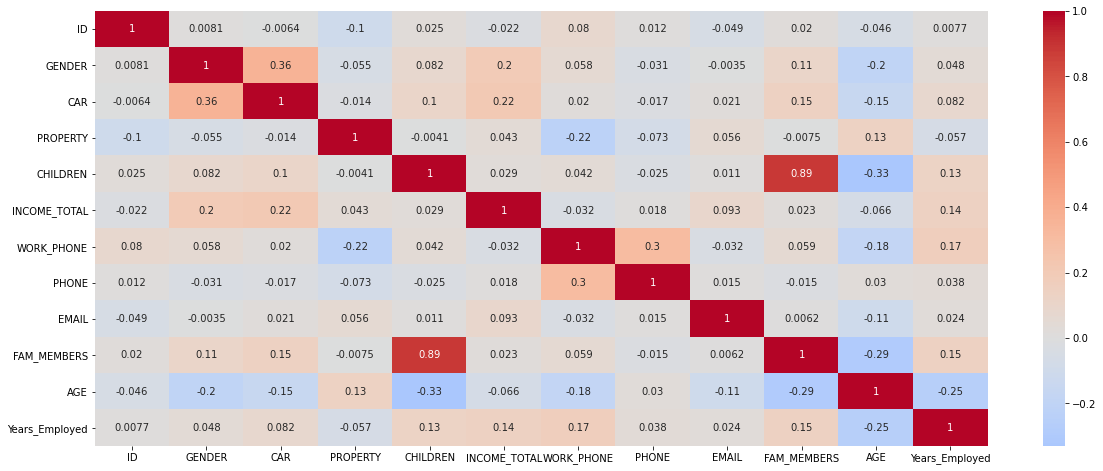

In [93]:
sns.heatmap(final_df.select_dtypes(include=np.number).corr(), center=0, cmap = "coolwarm", annot = True)

#### EDUCATION_TYPE

In [94]:
final_df['EDUCATION_TYPE'] = final_df['EDUCATION_TYPE'].map({'Academic degree': 1,'Higher education':2, 'Incomplete higher':3, 'Secondary / secondary special': 4,  'Lower secondary':5})  

#Convertimos esta columna en una categorica ordinal ordenados de mayor a menor nivel educativo.

#### FAMILY_STATUS

In [95]:
final_df['FAMILY_STATUS'] = final_df['FAMILY_STATUS'].map({'Civil marriage': 1,'Married':1, 'Single / not married':0, 'Separated': 0,  'Widow':0})

#Simplificar en casado/a o soltero/a
#1 Casado
#0 Soltero

#### INCOME_TYPE

In [96]:
#Reconvertir a una variable que sean las medias de income por tipo de ingresos.
final_df['INCOME_TYPE'] = final_df['INCOME_TYPE'].map(dict(final_df.groupby('INCOME_TYPE').mean().round(0)['INCOME_TOTAL']))

#### HOUSING_TYPE

In [97]:
#Aporta información poco relevante. La columna PROPERTY es mas interesante.
final_df.drop(labels = "HOUSING_TYPE", axis = 1, inplace = True)

#### INDEX

In [98]:
#Sustituimos el Indice por el ID
final_df.set_index('ID', drop=True,inplace=True)

#### OCCUPATION_TYPE

In [99]:
#Variable categorica nominal con 18 valores distintos. Muy complicado hacer un get_dummies
final_df.OCCUPATION_TYPE.unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [100]:
final_df.OCCUPATION_TYPE.nunique()

18

In [101]:
#El 30% de las filas tienen missin values.
(final_df.OCCUPATION_TYPE.isnull().sum()/len(final_df.OCCUPATION_TYPE))*100

30.92169260700389

In [102]:
#Dado que aporta demasiado poca información y sería sumamente complicado (y poco fiable) agrupar sus categorías, la borramos.
final_df.drop(labels = "OCCUPATION_TYPE", axis = 1, inplace = True)

#### STATUS

In [103]:
final_df['STATUS'].value_counts()

0    21114
X     2551
C      827
5      158
1       20
4        1
2        1
Name: STATUS, dtype: int64

In [104]:
#Target variable.
final_df['NEW_STATUS'] = final_df['STATUS'].map({'X': 1, 'C': 1, '0' : 2, '1': 2, '2':2 , '4': 2, '5':3})

In [105]:
(3378/(21135+159))*100

15.863623555931246

In [106]:
final_df['NEW_STATUS'].value_counts()

2    21136
1     3378
3      158
Name: NEW_STATUS, dtype: int64

#### FAM_MEMBERS

In [107]:
#Dropping FAM_MEMBERS:
final_df.drop('FAM_MEMBERS', axis=1, inplace=True)

#### Final Analysis

In [108]:
final_df.drop(['WORK_PHONE', 'PHONE', 'EMAIL', 'STATUS'], axis=1, inplace=True)

Tenemos 2 datasets:

**Primer Dataset:**

Variables Categóricas: 

 * Gender (M/F)	--> Pasamos a binaria
 * Is there a car? (Y/N) --> Pasamos a binaria  	
 * Is there a property? (Y/N) --> Pasamos a binaria 
 * Income type --> Media Income Total por categoría   
 * Education level --> Numérica Ordinal 	
 * Marital status --> Pasamos a binaria 	
 * Housing type --> DROP
 * Occupation --> DROP

Variables Numéricas: 

 * ID: Client Number --> Eliminamos los duplicados  
 * Is there a mobile phone ? (1/0) --> DROP
 * Is there a work phone ? (1/0) --> DROP
 * Is there a phone ?	(1/0) --> DROP
 * Is there an email ?(1/0)	--> DROP
 * Number of children --> DROP 	
 * Annual income 	
 * Days Birth --> Calculamos la edad
 * Days Employed --> Calculamos años empleo
 * Family size 	

**Segundo Dataset:** 

Variable Objetivo: 
    
* Categoría 1: Clientes que pagan a tiempo 
* Categoría 2: Clientes que pagan, pero con retraso
* Categoría 3: Clientes morosos 

# Final Dataset

In [109]:
final_df.head()

,GENDER,CAR,PROPERTY,CHILDREN,INCOME_TOTAL,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,AGE,Years_Employed,NEW_STATUS
ID,,,,,,,,,,,
5008804,1,1,1,0,427500.0,183305.0,2,1,32,4,2
5008805,1,1,1,0,427500.0,183305.0,2,1,32,4,2
5008806,1,1,1,0,112500.0,183305.0,4,1,58,2,2
5008808,0,0,1,0,270000.0,218827.0,4,0,52,3,2
5008810,0,0,1,0,270000.0,218827.0,4,0,52,3,2


# Análisis de las correlaciones

<AxesSubplot:>

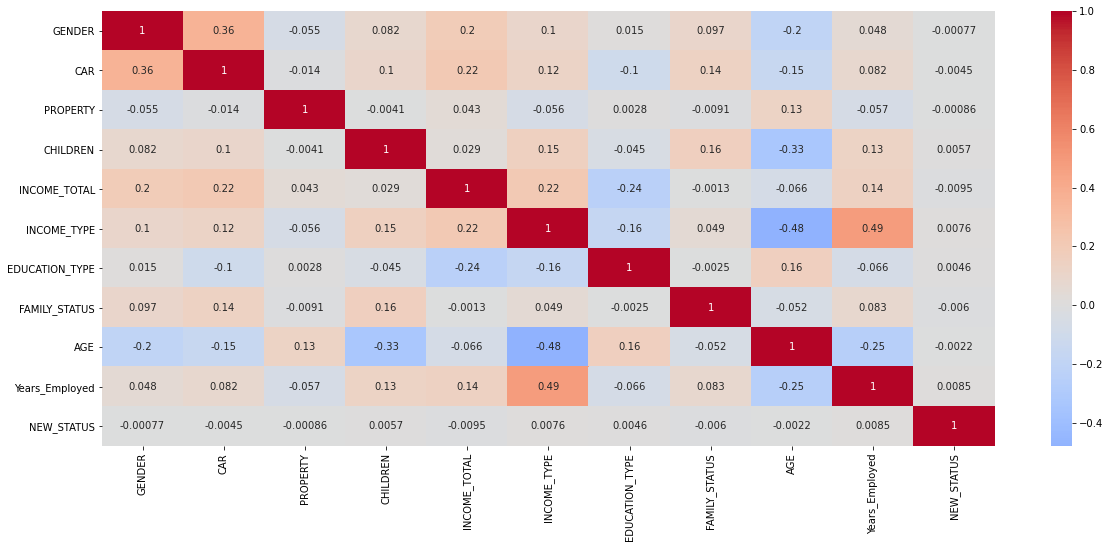

In [110]:
sns.heatmap(final_df.select_dtypes(include=np.number).corr(), center=0, cmap = "coolwarm", annot = True) 

# PCA
Analizamos la separabilidad de la variable objetivo

In [111]:
X = final_df.drop('NEW_STATUS',axis=1)
y = final_df['NEW_STATUS']

X_std = StandardScaler().fit_transform(X) #Estandarizamos la X

pca = PCA(n_components=10)

pc = pca.fit_transform(X_std)

pca.explained_variance_ratio_

array([0.2300456 , 0.13109415, 0.11958529, 0.10320759, 0.09479807,
       0.08987514, 0.07158113, 0.0645151 , 0.05609796, 0.03919996])

In [112]:
rcParams['figure.figsize'] = 13,7

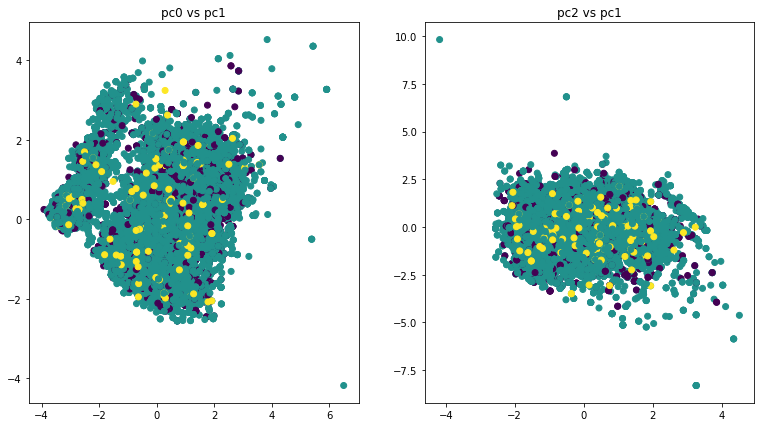

In [113]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.set_title('pc0 vs pc1')
ax1.scatter(pc[:,0], pc[:,1], c=y)
ax2.set_title('pc2 vs pc1')
ax2.scatter(pc[:,1], pc[:,2], c=y);

# Oversample Representation

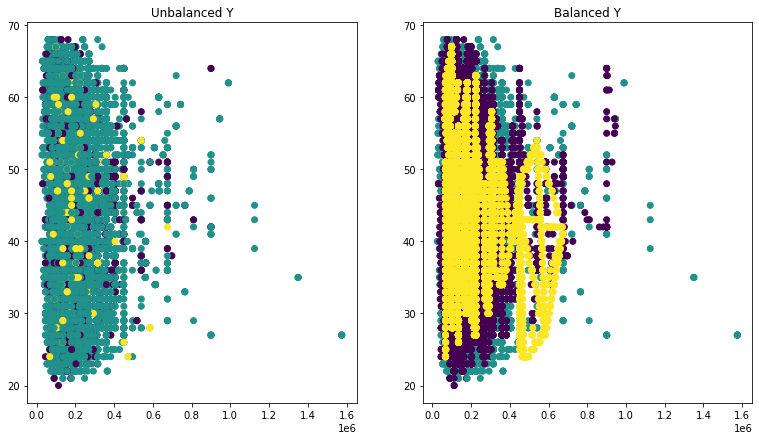

In [114]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.set_title('Unbalanced Y')
ax1.scatter(X.iloc[:,4], X.iloc[:,8], c=y)
ax2.set_title('Balanced Y')
oversample = SMOTE()
X_oversam, y_oversam = oversample.fit_resample(X, y)
ax2.scatter(X_oversam.iloc[:,4], X_oversam.iloc[:,8], c=y_oversam);

# ML Model Evaluation 

* Nuestro target es el grupo 2, dado que son los más rentables para las compañías de crédito
* Nos interesa minimizar los falsos positivos del grupo 3 y los del grupo 1 nos son indiferentes.

LogisticRegression test score is 0.337 and the train score is 0.334 


Confusion matrix :


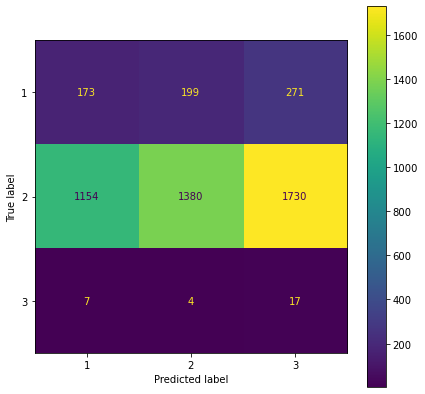


Classification report:

              precision    recall  f1-score   support

           1       0.13      0.27      0.18       643
           2       0.87      0.32      0.47      4264
           3       0.01      0.61      0.02        28

    accuracy                           0.32      4935
   macro avg       0.34      0.40      0.22      4935
weighted avg       0.77      0.32      0.43      4935

---------------------------------------------------------------------------------

KNeighbors test score is 0.744 and the train score is 0.847 


Confusion matrix :


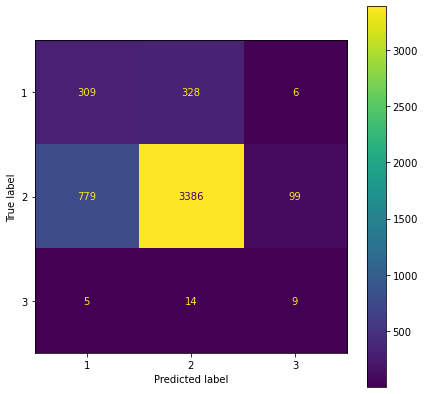


Classification report:

              precision    recall  f1-score   support

           1       0.28      0.48      0.36       643
           2       0.91      0.79      0.85      4264
           3       0.08      0.32      0.13        28

    accuracy                           0.75      4935
   macro avg       0.42      0.53      0.44      4935
weighted avg       0.82      0.75      0.78      4935

---------------------------------------------------------------------------------

SVC test score is 0.387 and the train score is 0.41 


Confusion matrix :


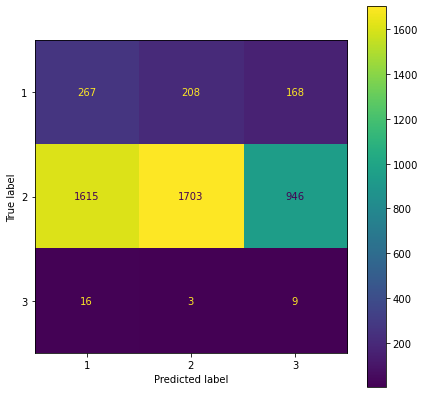


Classification report:

              precision    recall  f1-score   support

           1       0.14      0.42      0.21       643
           2       0.89      0.40      0.55      4264
           3       0.01      0.32      0.02        28

    accuracy                           0.40      4935
   macro avg       0.35      0.38      0.26      4935
weighted avg       0.79      0.40      0.50      4935

---------------------------------------------------------------------------------

DecisionTree test score is 0.807 and the train score is 0.908 


Confusion matrix :


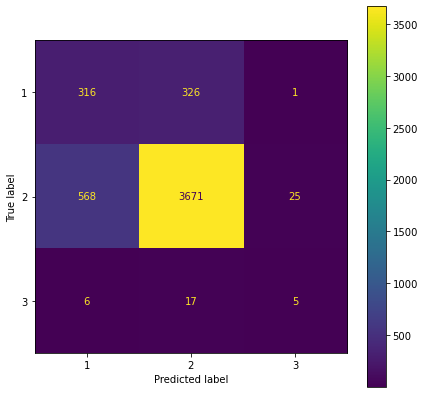


Classification report:

              precision    recall  f1-score   support

           1       0.36      0.49      0.41       643
           2       0.91      0.86      0.89      4264
           3       0.16      0.18      0.17        28

    accuracy                           0.81      4935
   macro avg       0.48      0.51      0.49      4935
weighted avg       0.84      0.81      0.82      4935

---------------------------------------------------------------------------------

RandomForest test score is 0.833 and the train score is 0.909 


Confusion matrix :


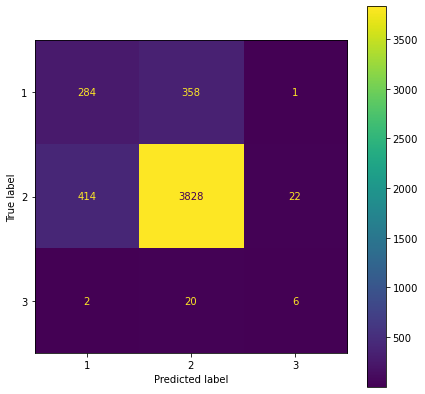


Classification report:

              precision    recall  f1-score   support

           1       0.41      0.44      0.42       643
           2       0.91      0.90      0.90      4264
           3       0.21      0.21      0.21        28

    accuracy                           0.83      4935
   macro avg       0.51      0.52      0.51      4935
weighted avg       0.84      0.83      0.84      4935

---------------------------------------------------------------------------------

XGBoost test score is 0.835 and the train score is 0.869 


Confusion matrix :


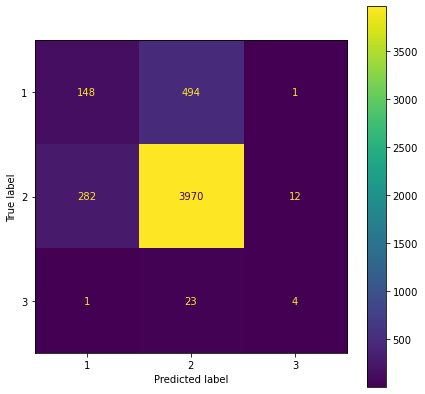


Classification report:

              precision    recall  f1-score   support

           1       0.34      0.23      0.28       643
           2       0.88      0.93      0.91      4264
           3       0.24      0.14      0.18        28

    accuracy                           0.84      4935
   macro avg       0.49      0.43      0.45      4935
weighted avg       0.81      0.84      0.82      4935

---------------------------------------------------------------------------------



In [54]:
df2 = final_df.copy()
df2['NEW_STATUS'] = df2['NEW_STATUS'].map({1: 1, 2: 2, 3: 3}) # 1 : X y C
X = df2.drop(['NEW_STATUS'], axis=1)                          # 2 : 0,1,2,3,4
y = df2['NEW_STATUS']                                         # 3 : 5


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
   "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(verbosity = 0)
}

for key, classifier in classifiers.items():
    
    pipe = Pipeline([('MMS', MinMaxScaler()), ('oversample',SMOTE()), (key, classifier)])
    pipe.fit(X_train,y_train)
    
    print('\033[1m' '\033[4m' + key + '\033[0m', 'test score is', round(pipe.score(X_test,y_test),3), 'and the train score is', round(pipe.score(X_train,y_train),3),'\n')
    
    print('\033[1m' + '\nConfusion matrix :' + '\033[0m') 
    plt.rcParams["figure.figsize"] = (7,7)
    plot_confusion_matrix(pipe.fit(X_train, y_train), X_test, y_test)
    plt.show()
    
    prediction = pipe.predict(X_test)
    print('\033[1m' +'\nClassification report:' + '\033[0m' +'\n')      
    print(classification_report(y_test, prediction))
    
    print('---------------------------------------------------------------------------------\n')

# Model Optimization
Los mejores modelos son:
* XGBoost
* KNeighbors 

## XGBoost

In [55]:
param_grid = {"XGBoost__gamma":  np.linspace(0,3,3), "XGBoost__max_depth":  range(5,15,2)}

pipe = Pipeline([('MMS', MinMaxScaler()), ('oversample',SMOTE()), ("XGBoost" , XGBClassifier())])

model = GridSearchCV(pipe, param_grid)

model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('MMS', MinMaxScaler()),
                                       ('oversample', SMOTE()),
                                       ('XGBoost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_de

XGB_model test score is 0.841 and the train score is 0.88 


Confusion matrix :


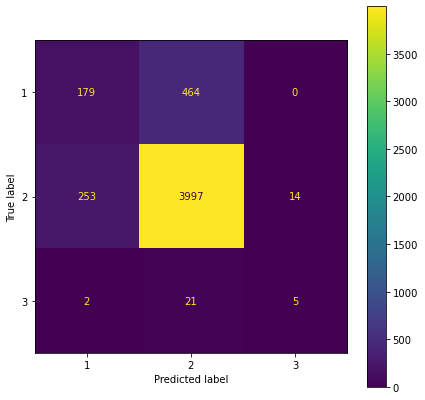


Classification report:

              precision    recall  f1-score   support

           1       0.41      0.28      0.33       643
           2       0.89      0.94      0.91      4264
           3       0.26      0.18      0.21        28

    accuracy                           0.85      4935
   macro avg       0.52      0.46      0.49      4935
weighted avg       0.83      0.85      0.83      4935



In [56]:
XGB_model = model.best_estimator_

XGB_model.fit(X_train, y_train)

print('\033[1m' '\033[4m' + 'XGB_model' + '\033[0m', 'test score is', round(XGB_model.score(X_test,y_test),3), 'and the train score is', round(XGB_model.score(X_train,y_train),3),'\n')

print('\033[1m' + '\nConfusion matrix :' + '\033[0m') 
plt.rcParams["figure.figsize"] = (7,7)
plot_confusion_matrix(XGB_model.fit(X_train, y_train), X_test, y_test)
plt.show()

prediction = XGB_model.predict(X_test)
print('\033[1m' +'\nClassification report:' + '\033[0m' +'\n')      
print(classification_report(y_test, prediction))

In [57]:
#El modelo no ha mejorado, incluso puede que haya empeorado.

## KNeighbors

In [58]:
param_grid = {"KNeighbors__n_neighbors": [3,5,7,9], 
              "KNeighbors__weights": ['uniform','distance'], 
              "KNeighbors__metric":['euclidean','manhattan'] }

pipe = Pipeline([('MMS', MinMaxScaler()), ('oversample',SMOTE()), ("KNeighbors" , KNeighborsClassifier())])

model = GridSearchCV(pipe, param_grid)

model.fit(X_train, y_train)

model.best_estimator_

Pipeline(steps=[('MMS', MinMaxScaler()), ('oversample', SMOTE()),
                ('KNeighbors',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

KNeighbors test score is 0.82 and the train score is 0.912 


Confusion matrix :


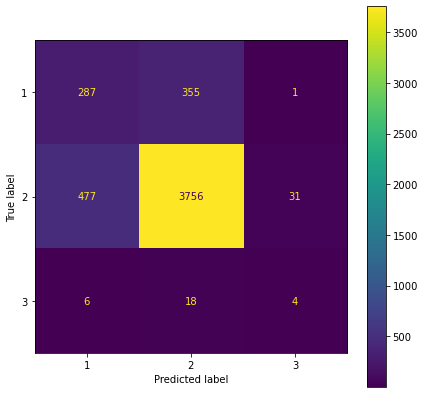


Classification report:

              precision    recall  f1-score   support

           1       0.37      0.45      0.41       643
           2       0.91      0.88      0.90      4264
           3       0.11      0.14      0.12        28

    accuracy                           0.82      4935
   macro avg       0.46      0.49      0.48      4935
weighted avg       0.84      0.82      0.83      4935



In [59]:
KNeighbors = model.best_estimator_

KNeighbors.fit(X_train, y_train)

print('\033[1m' '\033[4m' + 'KNeighbors' + '\033[0m', 'test score is', round(KNeighbors.score(X_test,y_test),3), 'and the train score is', round(KNeighbors.score(X_train,y_train),3),'\n')

print('\033[1m' + '\nConfusion matrix :' + '\033[0m') 
plt.rcParams["figure.figsize"] = (7,7)
plot_confusion_matrix(KNeighbors.fit(X_train, y_train), X_test, y_test)
plt.show()

prediction = KNeighbors.predict(X_test)
print('\033[1m' +'\nClassification report:' + '\033[0m' +'\n')      
print(classification_report(y_test, prediction))

In [60]:
#Ha mejorado marginalmente